In [1]:
%load_ext autoreload
%autoreload 2
from data_process.density_matrix_from_tomography import density_matrix_mle
from plot.plotter_two_qubit_density_matrix import *
from data_process.csv_tomography import load_csv_results
import numpy as np
import matplotlib as mpl
import os

In [2]:
# Number format
np.set_printoptions(
        precision=4,
        suppress=True,
        formatter={
                'complexfloat': lambda x:
                f"{x.real:.4f}"
                if abs(x.imag) < 1e-10
                else f"{x.real:.4f}{x.imag:+.4f}j"
        })

ρ_MLE:
 [[0.2780 -0.2421-0.0182j 0.1173-0.0355j -0.0950-0.0272j]
 [-0.2421+0.0182j 0.5652 -0.1145+0.0875j 0.2283-0.0074j]
 [0.1173+0.0355j -0.1145-0.0875j 0.0614 -0.0460-0.0425j]
 [-0.0950+0.0272j 0.2283+0.0074j -0.0460+0.0425j 0.0954]]
Purity:      0.7307
Concurrence: 0.1154


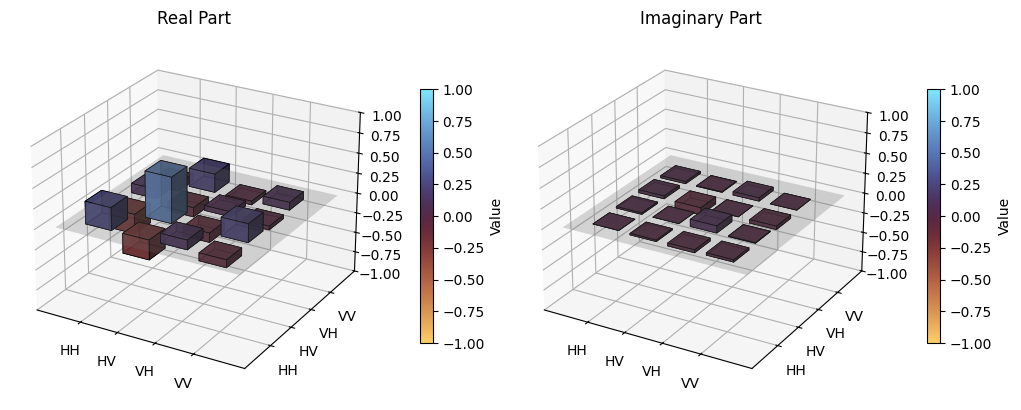

In [3]:
folder = '2025-07-17-211801_qtomo_test'
path = os.path.join('saved_data', folder, "total_averages.csv")
data = load_csv_results(path)

%matplotlib inline
rho, pu, co = density_matrix_mle(data)
print("ρ_MLE:\n", rho)
print(f"Purity:      {pu:.4f}")
print(f"Concurrence: {co:.4f}")
plot_density_matrix(rho, state_label=None,
                        components=['real', 'imag'],
                        zmin=-1, zmax=1)